In [2]:
using Plots
using Metaheuristics
gr()

Plots.PyPlotBackend()

## Ejemplo 1

Considere:
$$
f(x) = \sum_{i=1}^n x_i^2
$$

¿Qué propiedades tiene?

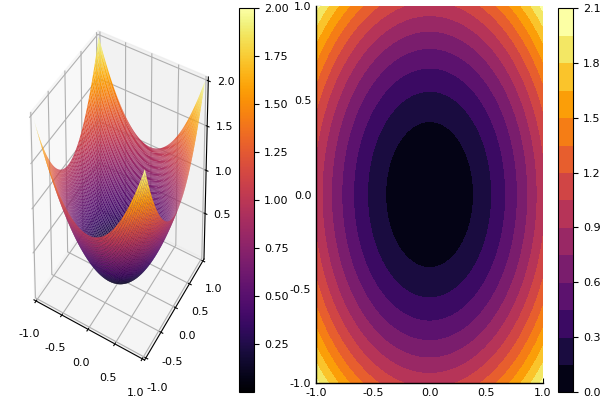

In [3]:
f(x⃗) = sum(x⃗.^2)

f(x, y) = f(Float64[x,y])

X = Y = range(-1, 1, length=100)
l = @layout [a b] 
plot(X, Y, f, lt=[:surface, :contourf], layout=l)

## Ejemplo 2

Considere:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 - 10\cos(2\pi x_i)
$$
¿Qué propiedades tiene?

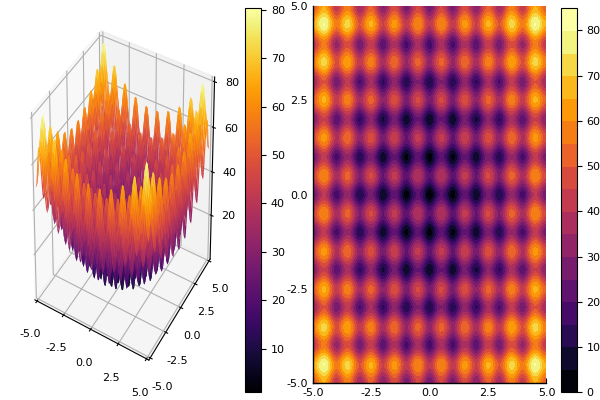

In [4]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 - 10cos.(2π*x⃗))

f(x, y) = f(Float64[x,y])

X = Y = range(-5, 5, length=100)

l = @layout [a b] 
plot(X, Y, f, lt=[:surface, :contourf], layout=l)

## Minimizando Ejemplo 1

Minimizar usando ED:
$$
f(x) = \sum_{i=1}^n x_i^2,
$$
donde
$$
x\in [-5, 5]^n
$$

+=========== STATE ==========+
| Iter.: 36
| f(x) = 6.26116e-06
| solution.x = [-0.00247431, -0.000372772]
| f calls: 1097
| Total time: 1.2723 s
+============================+
x* =  [-0.00247431, -0.000372772]


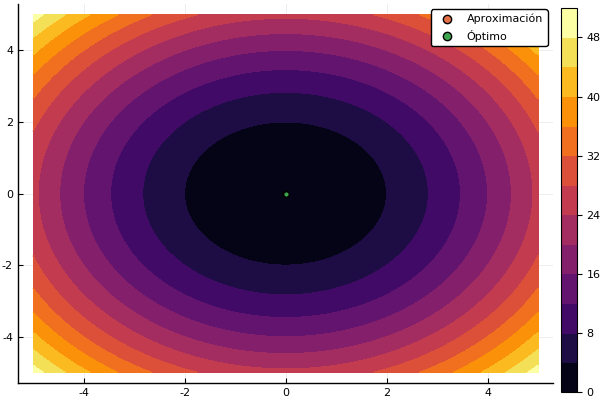

In [5]:
# función objetivo
f(x⃗) = sum(x⃗.^2)

# información del problema
información = Information(f_optimum = 0.0)
opciones = Options(store_convergence = true, f_tol = 1e-5)

# dimensión del problema
D = 2

# parámetros ED
evolucion_diferencial = DE(information = información, options=opciones,
    N = 30,  # tamaño población
    F  = 1.0, # Tamaño de paso
    CR = 0.9, # cruza
)


limites = Matrix([-5.0ones(D)  5ones(D)]')

# optimizando con Evolución diferencial
resultado = optimize(f, limites, evolucion_diferencial)
display(resultado)
x = resultado.best_sol.x
println("x* =  ", x)

# para graficar
X = range(-5, 5, length=100)
Y = range(-5, 5, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

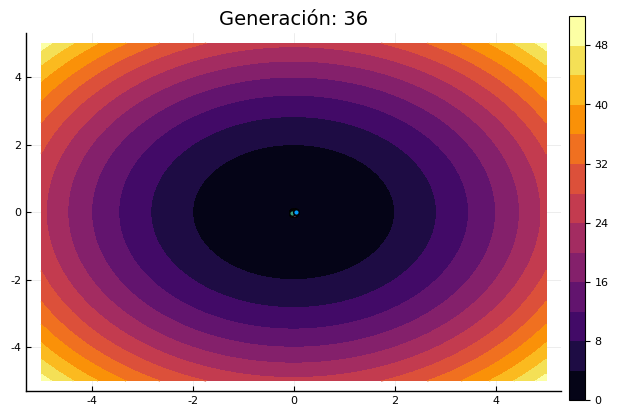

┌ Info: Saved animation to 
│   fn = /home/jesus/develop/repos/julia-python/tmp0.5895540474621168.gif
└ @ Plots /home/jesus/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/jesus/develop/repos/julia-python/tmp0.5895540474621168.gif")

In [6]:
anim = @animate for status = resultado.convergence
    
    X = range(-5, 5, length=100)
    Y = range(-5, 5, length=100)
    contourf(X, Y, f, title="Generación: $(status.iteration)")
    
    for sol in status.population
        scatter!(sol.x[1:1], sol.x[2:2], legend=false)
    end
end

gif(anim, "tmp$(rand()).gif")

## Minimizando Ejemplo 2

Minimizar usando DE:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 - 10\cos(2\pi x_i)
$$
donde
$$
x\in [-5, 5]^n
$$

+=========== STATE ==========+
| Iter.: 68
| f(x) = 6.00142e-07
| solution.x = [-4.09275e-6, 5.48478e-5]
| f calls: 2058
| Total time: 0.1531 s
+============================+
x* = [-4.09275e-6, 5.48478e-5]


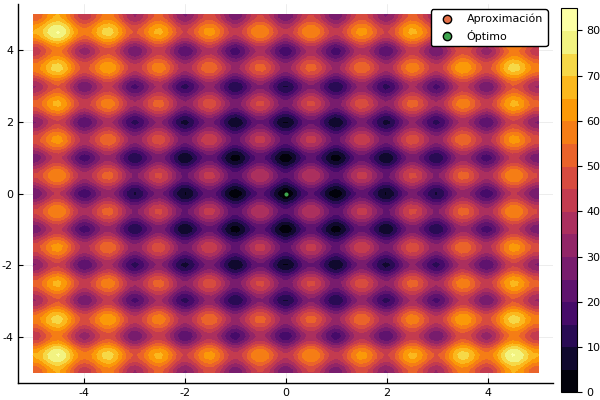

In [7]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 - 10cos.(2π*x⃗))

# información del problema
información = Information(f_optimum = 0.0)
opciones = Options(store_convergence = true, f_tol = 1e-5)

# dimensión del problema
D = 2

# parámetros ED
evolucion_diferencial = DE(information = información, options=opciones,
    N = 30,  # tamaño población
    F  = 1.0, # Tamaño de paso
    CR = 0.9 # cruza
)


limites = Matrix([-5.0ones(D)  5ones(D)]')

# optimizando con Evolución diferencial
resultado = optimize(f, limites, evolucion_diferencial)
display(resultado)
x = resultado.best_sol.x
println("x* = ", x)


X = range(-5, 5, length=100)
Y = range(-5, 5, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

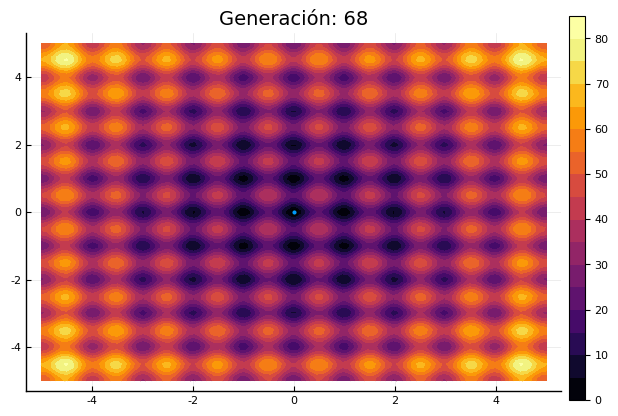

┌ Info: Saved animation to 
│   fn = /home/jesus/develop/repos/julia-python/tmp0.27886154429006904.gif
└ @ Plots /home/jesus/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/jesus/develop/repos/julia-python/tmp0.27886154429006904.gif")

In [8]:
anim = @animate for status = resultado.convergence
    
    X = range(-5, 5, length=100)
    Y = range(-5, 5, length=100)
    contourf(X, Y, f, title="Generación: $(status.iteration)")
    
    for sol in status.population
        scatter!(sol.x[1:1], sol.x[2:2], legend=false)
    end
end

gif(anim, "tmp$(rand()).gif")

## PSO

Optimice la función esfera usando PSO con sobre un espacio 10-dimensional

In [9]:
f(x⃗) = sum(x⃗.^2)

# dimensión
D = 10

# parámetros PSO
pso_parámetros = PSO(C1 = 2.0,
                     C2 = 2.0,
                      ω = 0.8)

limites = Matrix([-5.0ones(D)  5ones(D)]')

resultado = optimize(f, limites, pso_parámetros)
display(resultado)
x = resultado.best_sol.x
println("x* = ", x)

+=========== STATE ==========+
| Iter.: 999
| f(x) = 2.184e-27
| solution.x = [3.08967e-14, 3.63491e-15, -7.63388e-15, 1.74503e-14, -7.23033e-15, 1.27694e-14, -2.02502e-14, -6.22564e-15, 1.36116e-14, -1.98889e-15]
| f calls: 100000
| Total time: 1.3526 s
+============================+
x* = [3.08967e-14, 3.63491e-15, -7.63388e-15, 1.74503e-14, -7.23033e-15, 1.27694e-14, -2.02502e-14, -6.22564e-15, 1.36116e-14, -1.98889e-15]


## Problema de Caja-negra

El valor óptimo de esta función es 0, es decir, $f(x^*)=0$.

Considere $D = 2$.

ED: [39.1715, -99.0474] f(x) = 16.757220184182188
PSO: [-1.3169, -65.7541] f(x) = 0.6243465119628127


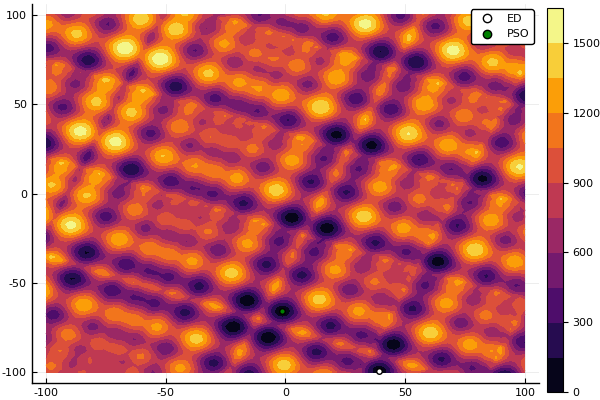

In [10]:
using CEC17


instancia = 10

# función objetivo
f(x) = cec17_test_func(x, instancia) - 100.0instancia

# dimensión
D = 2


limites = Matrix([-100.0ones(D)  100ones(D)]')


# parámetros ED
evolucion_diferencial = DE(
    N = 30,  # tamaño población
    F  = 1.0, # Tamaño de paso
    CR = 0.9 # cruza
)

evolucion_diferencial.options.store_convergence = true

# parámetros PSO
pso_parámetros = PSO(C1 = 2.0,
                     C2 = 2.0,
                      ω = 0.8)


# resultados de evolución diferencial
resultado_DE = optimize(f, limites, evolucion_diferencial)
x_DE = resultado_DE.best_sol.x
f_DE = resultado_DE.best_sol.f

# resultados de PSO
resultado_PSO = optimize(f, limites, pso_parámetros)
x_PSO = resultado_PSO.best_sol.x
f_PSO = resultado_PSO.best_sol.f

println("ED: ", x_DE, " f(x) = ", f_DE)
println("PSO: ", x_PSO, " f(x) = ", f_PSO)

# gráfica
X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)

contourf(X, Y, f)
scatter!([x_DE[1]], [x_DE[2]], label="ED", color=:white)
scatter!([x_PSO[1]], [x_PSO[2]], label="PSO", color=:green)


### ¿Qué pasa con D=10, 30, 100? 

+=========== STATE ==========+
| Iter.: 504
| f(x) = 16.7572
| solution.x = [39.1715, -99.0474]
| f calls: 15147
| Total time: 0.1127 s
+============================+


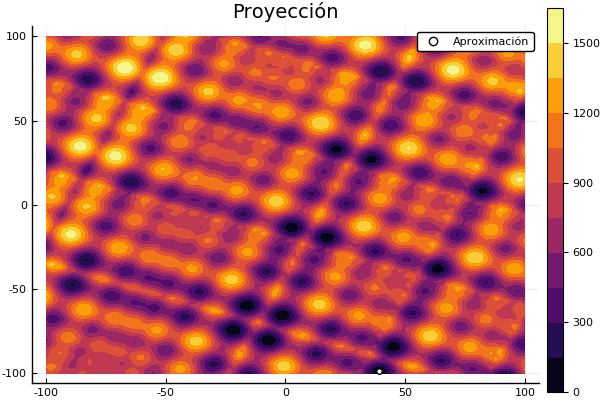

In [11]:
# función objetivo
f(x) = cec17_test_func(x, 10) - 1000.0

D = 10 # valores posibles: 10, 30, 50 ó 100.
# No usar otros valores para D ó el mundo se romperá.

# parámetros ED
evolucion_diferencial = DE(
    N = 30,  # tamaño población
    F  = 1.0, # Tamaño de paso
    CR = 0.9 # cruza
)

# optimizando con Evolución diferencial
resultado = optimize(f, limites, evolucion_diferencial)
display(resultado)
x = resultado.best_sol.x

X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)

contourf(X, Y, f, title="Proyección")
scatter!([x[1]], [x[2]], label="Aproximación", color=:white)